# 05 — Visualization (Sentiment & Topics)

This notebook creates the main plots used in the report, slides, and (later) Streamlit:

- average sentiment per event window
- sentiment composition (positive / neutral / negative) per event
- a readable table summary of labeled topics per event



In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 5)



In [3]:
# Sentiment outputs created earlier (02_sentiment_analysis notebook)
sent_event_path = "../data/processed/event_sentiment_event_level.csv"
sent_subreddit_path = "../data/processed/event_sentiment_subreddit_level.csv"

# Topic labels created in 04_topic_labeling notebook
topics_master_path = "../data/processed/topics_labeled/topics_labeled_master.csv"



In [4]:
sent_event = pd.read_csv(sent_event_path)
sent_sub = pd.read_csv(sent_subreddit_path)

print("Event-level sentiment:")
display(sent_event.head())

print("\nSubreddit-level sentiment:")
display(sent_sub.head())

topics = None
if os.path.exists(topics_master_path):
    topics = pd.read_csv(topics_master_path)
    print("\nTopics labeled master:")
    display(topics.head())
else:
    print("\nTopics labeled master file not found (topics_master_path).")


Event-level sentiment:


,event,n_comments,mean_compound,median_compound,pct_positive,pct_neutral,pct_negative
0,event1_kyiv,2940,-0.052446,0.0,34.013605,26.326531,39.659864
1,event2_kherson,795,0.014889,0.0,36.477987,30.188679,33.333333
2,event3_stalemate,9955,0.003329,0.0,38.503265,25.223506,36.273230
3,event4_trump_election,359088,-0.028450,0.0,36.149356,25.318863,38.531781
4,event5_white_house_meeting,241262,-0.013245,0.0,37.974484,23.641933,38.383583



Subreddit-level sentiment:


,event,subreddit,n_comments,mean_compound,pct_positive,pct_neutral,pct_negative
0,event1_kyiv,GTAorRussia,185,-0.008033,34.054054,30.810811,35.135135
1,event1_kyiv,InvasionOfUkraine,1700,-0.064994,34.117647,25.058824,40.823529
2,event1_kyiv,RussiaDenies,306,-0.055801,32.026144,29.411765,38.562092
3,event1_kyiv,RussiaReplacement,664,-0.025208,35.240964,26.807229,37.951807
4,event1_kyiv,UkrainePics,16,0.236119,50.000000,25.000000,25.000000



Topics labeled master:


,topic_id,top_words,label,event
0,0,"used, use, weapons, children, look, troops, se...","Battlefield updates (weapons, troops, visuals)",event1_kyiv
1,1,"shit, did, fuck, way, propaganda, world, right...",Propaganda + moral outrage / reactions,event1_kyiv
2,2,"pl, visa, ua, news, ready, help, polish, borde...",Poland border + visas + refugee movement,event1_kyiv
3,3,"sure, power, doing, better, mean, bad, point, ...",Power balance + escalation talk,event1_kyiv
4,4,"invasion, yes, countries, did, military, putin...",Invasion framing + military response,event1_kyiv


In [5]:
event_labels = {
    "event1_kyiv": "Battle for Kyiv",
    "event2_kherson": "Kherson liberation",
    "event3_stalemate": "Stalemate / fatigue",
    "event4_trump_election": "Trump election",
    "event5_white_house_meeting": "White House meeting",
}

sent_event_plot = sent_event.copy()
sent_event_plot["event_label"] = sent_event_plot["event"].map(event_labels)

sent_event_plot[["event", "event_label", "n_comments", "mean_compound"]]


,event,event_label,n_comments,mean_compound
0,event1_kyiv,Battle for Kyiv,2940,-0.052446
1,event2_kherson,Kherson liberation,795,0.014889
2,event3_stalemate,Stalemate / fatigue,9955,0.003329
3,event4_trump_election,Trump election,359088,-0.028450
4,event5_white_house_meeting,White House meeting,241262,-0.013245


## Average Sentiment by Event

This plot shows the average VADER compound score per event window.
Values above 0 are more positive on average; values below 0 are more negative.


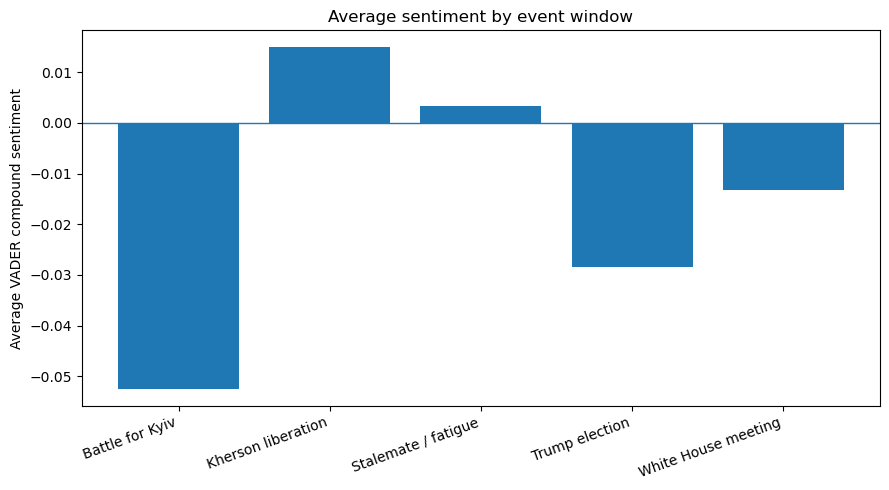

In [7]:
plt.figure()
plt.bar(sent_event_plot["event_label"], sent_event_plot["mean_compound"])
plt.axhline(0, linewidth=1)
plt.xticks(rotation=20, ha="right")
plt.ylabel("Average VADER compound sentiment")
plt.title("Average sentiment by event window")
plt.tight_layout()
plt.show()


## Topics labeled master

This figure presents the average compound sentiment score for each event, aggregating individual comment sentiment using VADER. The trend shows a gradual decline in overall sentiment across time.

While the Battle for Kyiv and Kherson events are characterized by near-neutral or slightly positive sentiment, later events exhibit more negative average scores. This suggests that prolonged conflict and political debate may contribute to a more critical or pessimistic tone in public discussions about the war.

## Sentiment Composition by Event

This bar chart shows how the percent of positive / neutral / negative
comments changes across events.


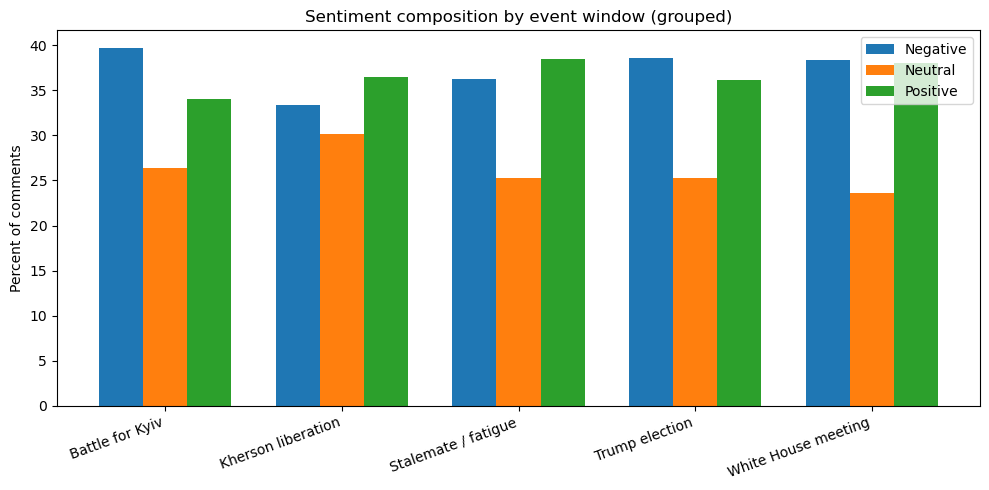

In [9]:
import numpy as np


# Ensure we have a clean plotting DF
sent_event_plot = sent_event.copy()
event_labels = {
    "event1_kyiv": "Battle for Kyiv",
    "event2_kherson": "Kherson liberation",
    "event3_stalemate": "Stalemate / fatigue",
    "event4_trump_election": "Trump election",
    "event5_white_house_meeting": "White House meeting",
}
sent_event_plot["event_label"] = sent_event_plot["event"].map(event_labels)

# Order events nicely (so plots are consistent)
order = ["event1_kyiv","event2_kherson","event3_stalemate","event4_trump_election","event5_white_house_meeting"]
sent_event_plot = sent_event_plot.set_index("event").loc[order].reset_index()

x = np.arange(len(sent_event_plot))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, sent_event_plot["pct_negative"], width, label="Negative")
plt.bar(x,         sent_event_plot["pct_neutral"], width, label="Neutral")
plt.bar(x + width, sent_event_plot["pct_positive"], width, label="Positive")

plt.xticks(x, sent_event_plot["event_label"], rotation=20, ha="right")
plt.ylabel("Percent of comments")
plt.title("Sentiment composition by event window (grouped)")
plt.legend()
plt.tight_layout()
plt.show()


## Subreddit-level sentiment:

This figure compares the distribution of sentiment across events using three categories: 
positive, neutral, and negative. Early events show a higher share of neutral and positive sentiment, consistent with expressions of solidarity and support for Ukraine during the initial phase of the war.

Over time, the proportion of negative sentiment increases, particularly during the Trump election and White House meeting events. This shift suggests growing frustration, skepticism, or polarization in public discussions, even as attention to the war intensifies. The results indicate that higher engagement does not necessarily correspond to more supportive sentiment.


##  Net sentiment trend (positive − negative)

Net sentiment is computed as:

net = pct_positive − pct_negative

This is a simple summary of whether the discussion skews more supportive (positive tone)
or more negative tone over time.


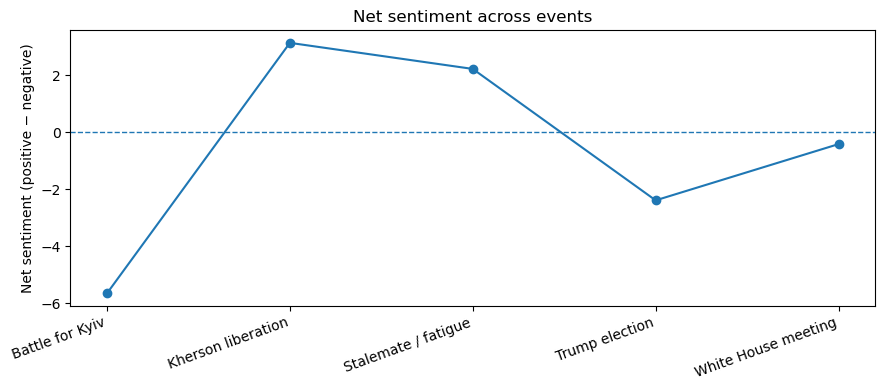

,event_label,pct_positive,pct_negative,net_sentiment
0,Battle for Kyiv,34.013605,39.659864,-5.646259
1,Kherson liberation,36.477987,33.333333,3.144654
2,Stalemate / fatigue,38.503265,36.273230,2.230035
3,Trump election,36.149356,38.531781,-2.382424
4,White House meeting,37.974484,38.383583,-0.409099


In [11]:
sent_event_plot["net_sentiment"] = sent_event_plot["pct_positive"] - sent_event_plot["pct_negative"]

plt.figure(figsize=(9,4))
plt.plot(sent_event_plot["event_label"], sent_event_plot["net_sentiment"], marker="o")
plt.axhline(0, linestyle="--", linewidth=1)
plt.xticks(rotation=20, ha="right")
plt.ylabel("Net sentiment (positive − negative)")
plt.title("Net sentiment across events")
plt.tight_layout()
plt.show()

sent_event_plot[["event_label", "pct_positive", "pct_negative", "net_sentiment"]]


This figure shows the net sentiment for each event, calculated as the percentage of positive comments minus the percentage of negative comments. Values above zero indicate a more supportive tone overall, while values below zero indicate a more negative or critical tone.

The Battle for Kyiv shows a strongly negative net sentiment, suggesting that early discussions were dominated by fear, shock, and concern rather than optimism. In contrast, the Kherson liberation marks the most positive net sentiment across all events, reflecting a temporary shift toward optimism and perceived progress in the war.

During the stalemate and war fatigue period, net sentiment remains slightly positive but begins to decline, indicating growing uncertainty and reduced enthusiasm. A sharp drop occurs during the Trump election event, where net sentiment becomes clearly negative, coinciding with increased political polarization and debate over U.S. involvement.

Although sentiment partially recovers during the White House meeting, it remains slightly negative overall. This pattern suggests that while public engagement increases over time, sustained political framing and prolonged conflict contribute to a more critical and less supportive tone in discussions about the Ukraine war.

## Topic summary (labeled)

Below is a readable summary of the labeled topics for each event.
These labels will be used in the report and in the Streamlit app.


In [13]:
if topics is None:
    print("Topics master file not loaded in this notebook.")
else:
    topic_summary = (
        topics[["event", "topic_id", "label", "top_words"]]
        .drop_duplicates()
        .copy()
    )
    topic_summary["event_label"] = topic_summary["event"].map(event_labels)
    topic_summary = topic_summary.sort_values(["event", "topic_id"])
    display(topic_summary[["event_label", "topic_id", "label", "top_words"]])


,event_label,topic_id,label,top_words
0,Battle for Kyiv,0,"Battlefield updates (weapons, troops, visuals)","used, use, weapons, children, look, troops, se..."
1,Battle for Kyiv,1,Propaganda + moral outrage / reactions,"shit, did, fuck, way, propaganda, world, right..."
2,Battle for Kyiv,2,Poland border + visas + refugee movement,"pl, visa, ua, news, ready, help, polish, borde..."
3,Battle for Kyiv,3,Power balance + escalation talk,"sure, power, doing, better, mean, bad, point, ..."
4,Battle for Kyiv,4,Invasion framing + military response,"invasion, yes, countries, did, military, putin..."
5,Kherson liberation,0,Leadership + war framing (Putin / narratives),"way, shit, training, country, real, putin, lov..."
6,Kherson liberation,1,War timeline + personal reactions,"months, person, fucking, case, great, getting,..."
7,Kherson liberation,2,Military shock + civilian harm,"fuck, military, eject, insane, children, belie..."
8,Kherson liberation,3,Help / logistics / questions,"doing, questions, sure, want, line, use, help,..."
9,Kherson liberation,4,General reactions + humor / chatter,"old, big, thanks, got, ve, sure, work, lol, gu..."


## U.S.-focused vs other subreddits

Here I compare sentiment in a small set of U.S.-political subreddits against other
international war/news subreddits. This is a proxy for U.S. domestic framing.


In [15]:


df = sent_sub.copy()

# event_label exists earlier in your notebook; keep fallback just in case
if "event_label" not in df.columns:
    df["event_label"] = df["event"].map(event_labels)

# Your exact US-focused definition
us_focused_subreddits = {
    "politics",
    "Conservative",
    "neoliberal",
    "WayOfTheBern",
    "AskReddit",
    "news",
    "worldnews",
    "geopolitics",
}

df["is_us_focused"] = df["subreddit"].isin(us_focused_subreddits)

# ---- Weighted mean WITHOUT groupby.apply ----
# weighted_mean = sum(mean_compound * n_comments) / sum(n_comments)

df["weighted_sum"] = df["mean_compound"] * df["n_comments"]

weighted = (
    df.groupby(["event", "event_label", "is_us_focused"], observed=True)
      .agg(weighted_sum=("weighted_sum", "sum"), total_weight=("n_comments", "sum"))
      .reset_index()
)

weighted["weighted_mean_compound"] = weighted["weighted_sum"] / weighted["total_weight"]

pivot = (
    weighted.pivot_table(
        index=["event", "event_label"],
        columns="is_us_focused",
        values="weighted_mean_compound",
        observed=True
    )
    .reset_index()
    .rename(columns={True: "us_focused", False: "non_us_focused"})
)

pivot["event"] = pd.Categorical(pivot["event"], categories=order, ordered=True)
pivot = pivot.sort_values("event")

display(pivot[["event_label", "us_focused", "non_us_focused"]])


is_us_focused,event_label,us_focused,non_us_focused
0,Battle for Kyiv,NaN,-0.052446
1,Kherson liberation,NaN,0.014889
2,Stalemate / fatigue,NaN,0.003329
3,Trump election,-0.044419,-0.022756
4,White House meeting,-0.020891,-0.009558


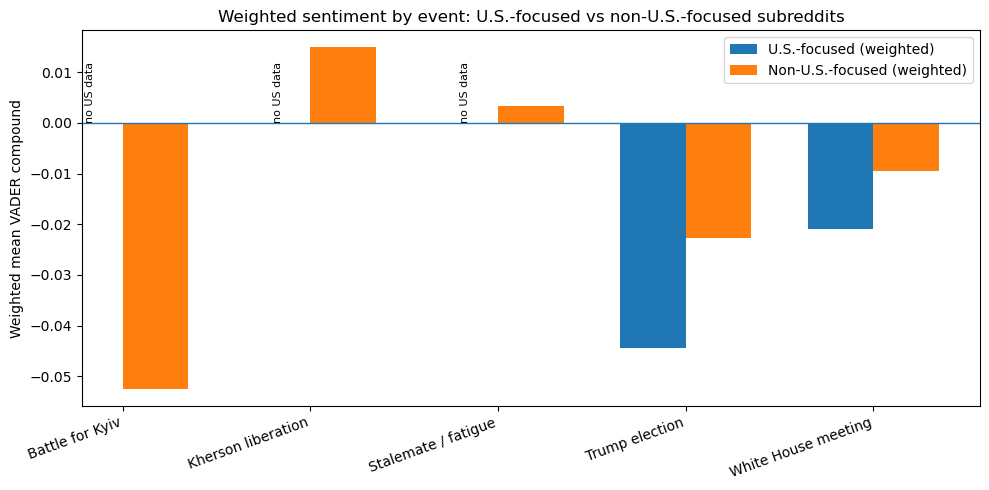

In [16]:

x = np.arange(len(pivot))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, pivot["us_focused"], width, label="U.S.-focused (weighted)")
plt.bar(x + width/2, pivot["non_us_focused"], width, label="Non-U.S.-focused (weighted)")
plt.axhline(0, linewidth=1)

plt.xticks(x, pivot["event_label"], rotation=20, ha="right")
plt.ylabel("Weighted mean VADER compound")
plt.title("Weighted sentiment by event: U.S.-focused vs non-U.S.-focused subreddits")

# Annotate missing US-focused values
for i, v in enumerate(pivot["us_focused"]):
    if pd.isna(v):
        plt.text(i - width/2, 0, "no US data", ha="center", va="bottom", fontsize=8, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


This figure compares average sentiment between U.S.-focused subreddits and non-U.S.-focused subreddits for each event. For the first three events, sentiment values for U.S.-focused subreddits are missing due to limited participation from U.S. political communities during the early stages of the war.

In contrast, during the Trump election and White House meeting events, sufficient U.S.-focused data becomes available. In these later events, U.S.-focused subreddits show consistently more negative sentiment compared to non-U.S.-focused communities. This divergence suggests that U.S. domestic political framing may amplify criticism or fatigue toward continued involvement in the war.